In [13]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#Generating random cities

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
#From the beginning to the end of the lat and long ranges, we want 1500 values each
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

#making lat, long pairs:
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#print(cities)

623

In [4]:
#Performing API Calls
#Fields:
#City, Lat
  #    Lng
   #   Max Temp
    #  Humidity
     # Cloudiness
      #Wind Speed
      #Country
      #Date
    #weather_json["main"]["temp"]

In [34]:
#Open weather information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"


#field_names
#empty lists for the fields
city_list = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

for city in cities:
    
    #Get the city's number
    city_no = cities.index(city) + 1
    
    try:
        query_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
        
        

        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()

        #Put the city's weather into lists
        city_list.append(weather_json["name"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json["main"]["temp_max"])
        humidity.append(weather_json["main"]["humidity"])
        cloudiness.append(weather_json["clouds"]["all"])
        wind_speed.append(weather_json["wind"]["speed"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        
        print(f"Getting {city}\'s weather information(City #{city_no})." )
    except KeyError:
        print(f"Can't find {city} (City #{city_no}) .")

Getting busselton's weather information(City #1).
Getting hermanus's weather information(City #2).
Getting port alfred's weather information(City #3).
Getting linares's weather information(City #4).
Getting pevek's weather information(City #5).
Getting khandyga's weather information(City #6).
Getting cape town's weather information(City #7).
Getting havelock's weather information(City #8).
Getting saint anthony's weather information(City #9).
Getting rikitea's weather information(City #10).
Getting tuktoyaktuk's weather information(City #11).
Getting elizabeth city's weather information(City #12).
Getting nelson bay's weather information(City #13).
Getting tautira's weather information(City #14).
Getting castro's weather information(City #15).
Can't find taolanaro (City #16) .
Can't find nguiu (City #17) .
Getting lebu's weather information(City #18).
Getting sitka's weather information(City #19).
Getting qaanaaq's weather information(City #20).
Getting tasiilaq's weather information(C

Getting alto longa's weather information(City #169).
Getting carlyle's weather information(City #170).
Getting camocim's weather information(City #171).
Getting rundu's weather information(City #172).
Getting camacha's weather information(City #173).
Getting osinki's weather information(City #174).
Getting tshikapa's weather information(City #175).
Getting krasnoselkup's weather information(City #176).
Getting srednekolymsk's weather information(City #177).
Getting nisia floresta's weather information(City #178).
Getting airai's weather information(City #179).
Getting gamba's weather information(City #180).
Getting bethel's weather information(City #181).
Getting touba's weather information(City #182).
Getting allen's weather information(City #183).
Getting nioro's weather information(City #184).
Can't find katha (City #185) .
Getting oranjemund's weather information(City #186).
Getting laguna's weather information(City #187).
Getting bronnoysund's weather information(City #188).
Getti

Getting puerto colombia's weather information(City #333).
Getting brae's weather information(City #334).
Getting padang's weather information(City #335).
Getting nouadhibou's weather information(City #336).
Can't find longlac (City #337) .
Getting plettenberg bay's weather information(City #338).
Getting luba's weather information(City #339).
Getting mount isa's weather information(City #340).
Getting kholtoson's weather information(City #341).
Can't find stoyba (City #342) .
Getting lockhart's weather information(City #343).
Can't find sedelnikovo (City #344) .
Getting cayenne's weather information(City #345).
Getting ambilobe's weather information(City #346).
Getting gobabis's weather information(City #347).
Getting boa esperanca's weather information(City #348).
Getting alice springs's weather information(City #349).
Getting gondanglegi's weather information(City #350).
Getting palmer's weather information(City #351).
Getting kruisfontein's weather information(City #352).
Can't find

Getting gimli's weather information(City #500).
Getting manavgat's weather information(City #501).
Getting khani's weather information(City #502).
Getting parabel's weather information(City #503).
Getting xuddur's weather information(City #504).
Getting sale's weather information(City #505).
Getting gwembe's weather information(City #506).
Getting sinnar's weather information(City #507).
Getting lardos's weather information(City #508).
Getting khargone's weather information(City #509).
Can't find bargal (City #510) .
Getting sao bartolomeu de messines's weather information(City #511).
Getting baruun-urt's weather information(City #512).
Getting raga's weather information(City #513).
Getting rawson's weather information(City #514).
Getting taksimo's weather information(City #515).
Can't find achisay (City #516) .
Getting la cruz's weather information(City #517).
Getting san onofre's weather information(City #518).
Getting aksu's weather information(City #519).
Getting leo's weather info

In [30]:
#Putting city results into a csv
city_dict = {'City': city_list, 'Lat': lat, 'Lng': lng, "Max Temp": max_temp, "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed, "Country": country, "Date": date}


In [32]:
zd = zip(*city_dict.values())
#, encoding='utf-8'

with open("output_data/cities.csv", 'w', encoding='utf-8') as file:
    writer = csv.writer(file, delimiter=',', lineterminator = '\n')
    writer.writerow(city_dict.keys())
    writer.writerows(zd)


In [35]:
#Dataframe of our city data
city_df = pd.read_csv("output_data/cities.csv")
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.65,115.33,59.00,90,0,16.04,AU,1608418814
1,Hermanus,-34.42,19.23,62.01,90,0,1.01,ZA,1608419152
2,Port Alfred,-33.59,26.89,72.00,96,6,3.00,ZA,1608419176
3,Linares,-35.85,-71.60,72.36,33,36,13.02,CL,1608419311
4,Pevek,69.70,170.31,1.26,90,0,6.13,RU,1608419146


In [36]:
#making sure there's no cities where the humidity is over 100
error_df = city_df[city_df["Humidity"] > 100]
error_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [ ]:
#Plotting Temperature(F) vs Latitude

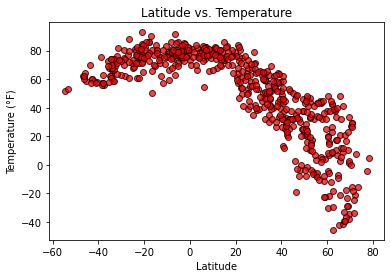

In [40]:
plt.scatter(city_df["Lat"], city_df["Max Temp"], marker="o", facecolors="red", edgecolors="black", alpha=0.75)
plt.ylabel('Temperature (°F)')
plt.xlabel('Latitude')
plt.title("Latitude vs. Temperature")
plt.show()